<a href="https://colab.research.google.com/github/aaroha33/My-Assignments/blob/main/Tredence_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center> Tredence Analytics Assignment </center></h1>



* Your client ABC (manuf_data) came with an ask that they don’t have visibility of the sales on retailer platforms(retailer_data). Reason there is no unique key mapping       product of ABC to its product being sold on retailer (retailer example-Amazon). In the absence of a common primary key, you are left with descriptions to do the mapping. You need to use the description of ABC (manuf_data) and description of its product on retailer platform(retailer_data) to do the mapping
* Map all the retailer product to top 3-4 best possible match on ABC side. Use any NLP technique to the achieve the objective
* Things to keep in mind- we have not provided any training data- please create one if needed, clearly comment your code.





<font color="blue" size=+2.5><b> Import ibrary </b></font>

In [34]:
import io
import os

import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
import plotly.graph_objects as go
from nltk.tokenize import ToktokTokenizer

from nltk.tokenize import TweetTokenizer 
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


<font color="blue" size=+2.5><b> Upload Data Sets </b></font>

In [20]:
from google.colab import files
uploaded = files.upload()


Saving retailer_data.xlsx to retailer_data (1).xlsx
Saving manuf_data.xlsx to manuf_data (1).xlsx


In [21]:
retail = pd.read_excel(io.BytesIO(uploaded['retailer_data.xlsx']))
mnf = pd.read_excel(io.BytesIO(uploaded['manuf_data.xlsx']))

<font color="blue" size=+2.5><b> EDA </b></font>

In [5]:
retail.head()

,ret_prod_id,Product_Description
0,188,Oddaced Give Me Moisture Shampoo 250ml
1,334,Cbvery Freeze Hold Hairspray 400ml
2,328,Cbvery Firm Hold Hairspray 400ml
3,203,Oddaced Ultimate Hold Hairspray 400ml
4,324,Cbvery Extra Hold Hairspray 400ml


In [6]:
mnf.head()

,prod_id,Description
0,355,Mexifiz Shampoo Intensive Repair 400ml
1,356,Mexifiz Shampoo Intensive Repair 400ml
2,381,Cbv Shampoo Moisture Rich 900ml
3,382,Cbv Shampoo Moisture Rich 900ml
4,426,Cbvery Hairspray Extra Hold 400ml


In [7]:
mnf.isnull().sum()
retail.isnull().sum()

ret_prod_id            0
Product_Description    0
dtype: int64

<font color="blue" size=+2.5><b> WORDCLOUD </b></font>

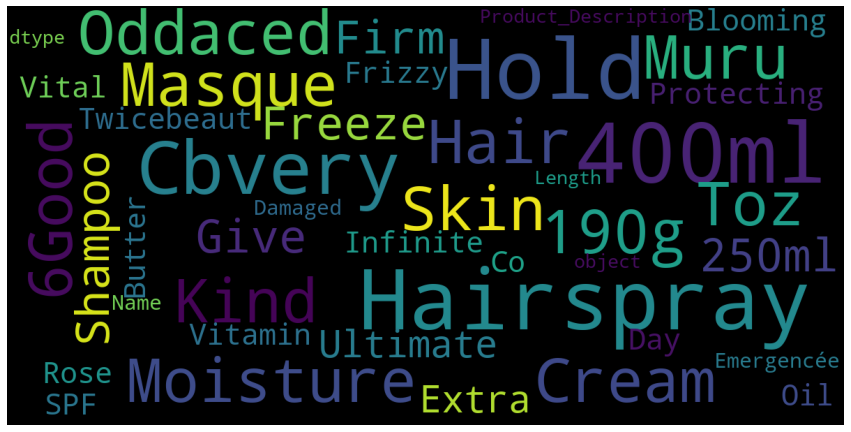

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(retail['Product_Description'])

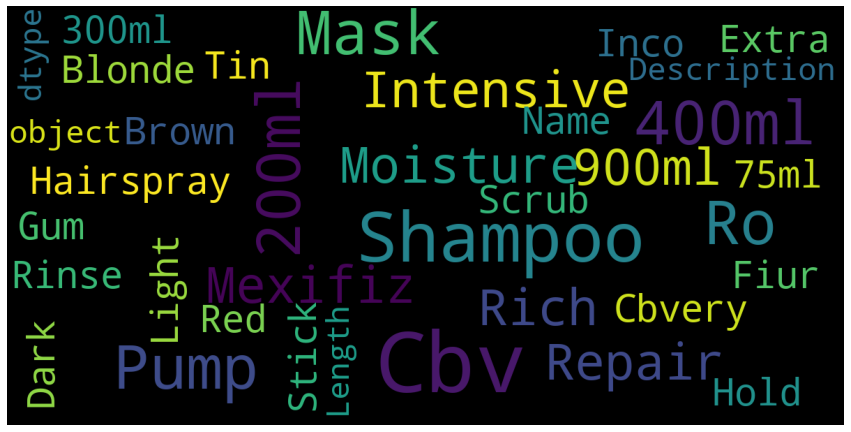

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(mnf['Description'])

In [37]:
retail['Description_length'] = retail['Product_Description'].apply(len)
#retail['Product_Description_length1'] = [len(t) for t in retail.Product_Description]

In [11]:
retail.Product_Description_length.nunique()

87

In [12]:
retail.head()

,ret_prod_id,Product_Description,Product_Description_length
0,188,Oddaced Give Me Moisture Shampoo 250ml,38
1,334,Cbvery Freeze Hold Hairspray 400ml,34
2,328,Cbvery Firm Hold Hairspray 400ml,32
3,203,Oddaced Ultimate Hold Hairspray 400ml,37
4,324,Cbvery Extra Hold Hairspray 400ml,33


### Overall Distribution of the length 

AttributeError: ignored

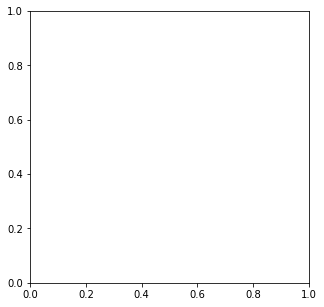

In [46]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(retail.Description_length)
plt.show()

In [43]:
mnf['Description_length'] = mnf['Description'].apply(len)
mnf.head()

,prod_id,Description,Description_length
0,355,Mexifiz Shampoo Intensive Repair 400ml,38
1,356,Mexifiz Shampoo Intensive Repair 400ml,38
2,381,Cbv Shampoo Moisture Rich 900ml,31
3,382,Cbv Shampoo Moisture Rich 900ml,31
4,426,Cbvery Hairspray Extra Hold 400ml,33


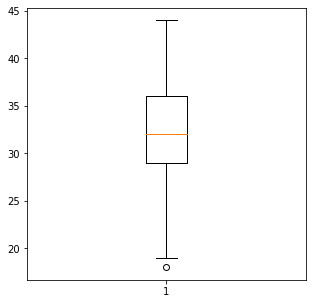

In [45]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(mnf.Description_length)
plt.show()

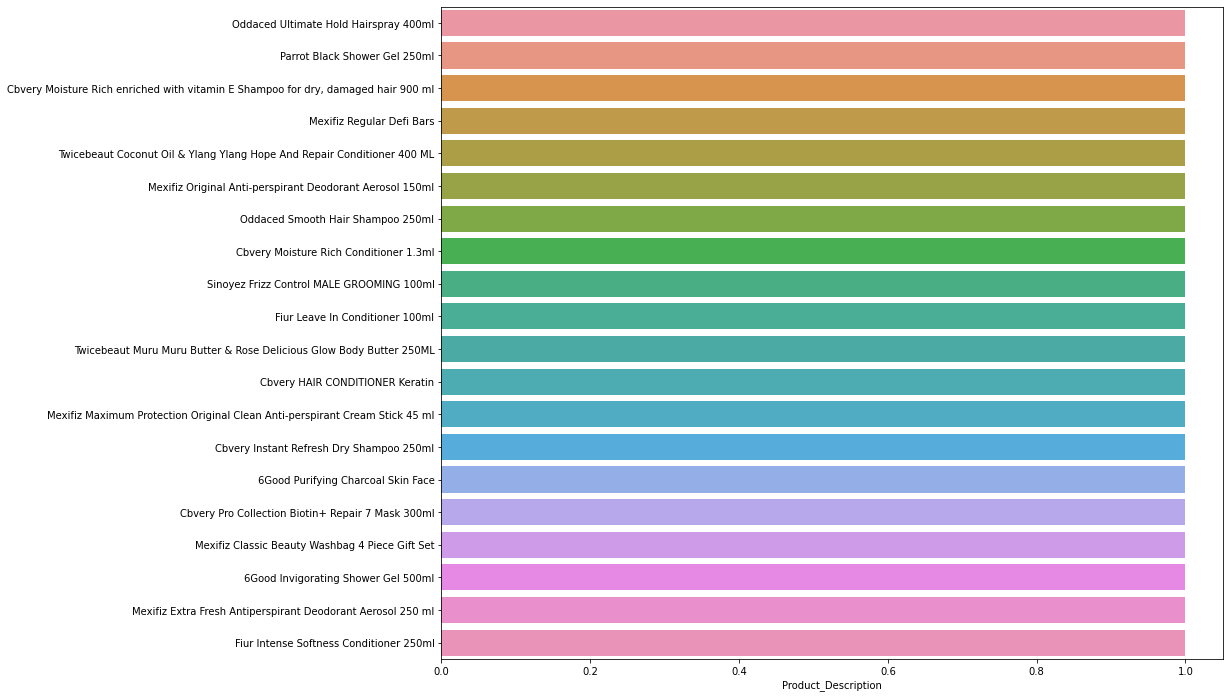

In [13]:
# Plotting the first 20 most common keywords in retail
figure = plt.figure(figsize=(14,12))
sns.barplot(y=retail['Product_Description'].value_counts().index[:20], x=retail['Product_Description'].value_counts()[:20])

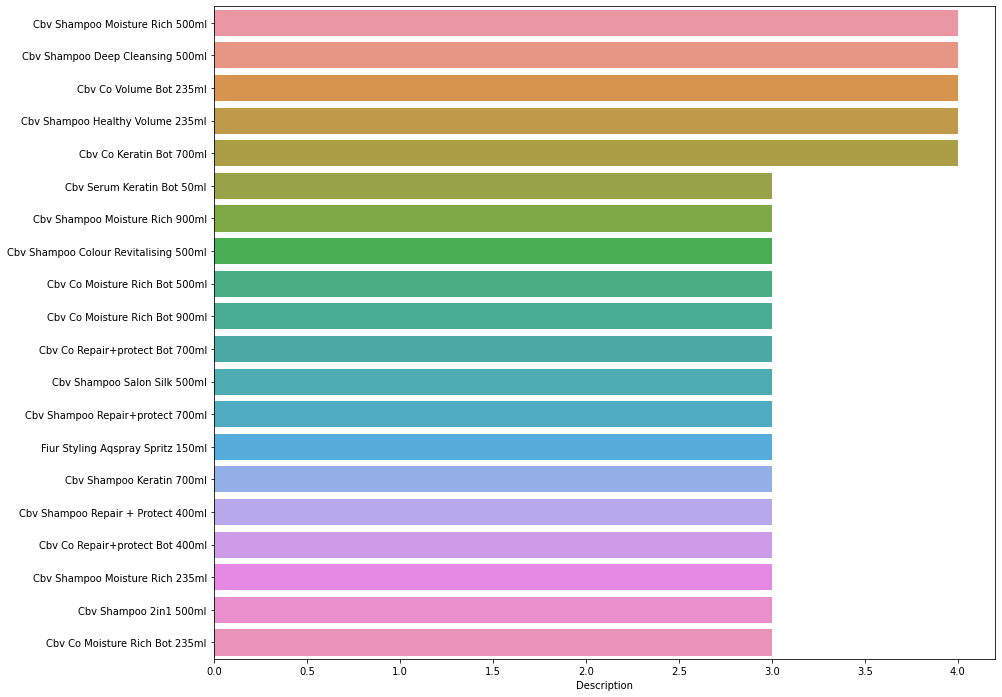

In [14]:
# Plotting the first 20 most common keywords in manufacturing(abc)
figure = plt.figure(figsize=(14,12))
sns.barplot(y=mnf['Description'].value_counts().index[:20], x=mnf['Description'].value_counts()[:20])

**What about frequency of the words?**

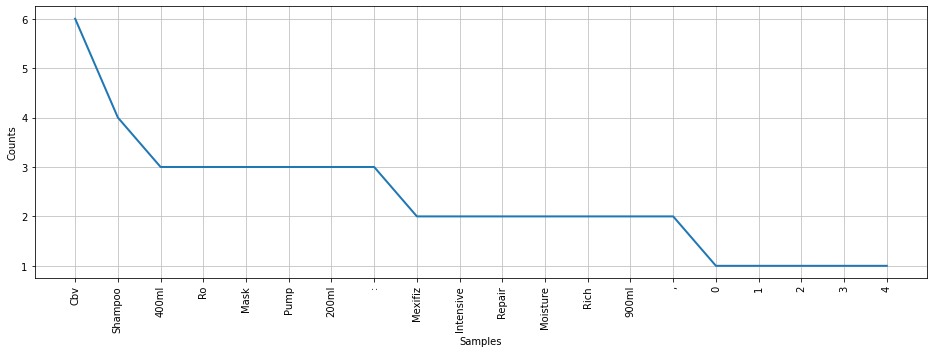

In [18]:
x=nltk.FreqDist(ToktokTokenizer().tokenize(mnf['Description']))
plt.figure(figsize=(16,5))
x.plot(20)

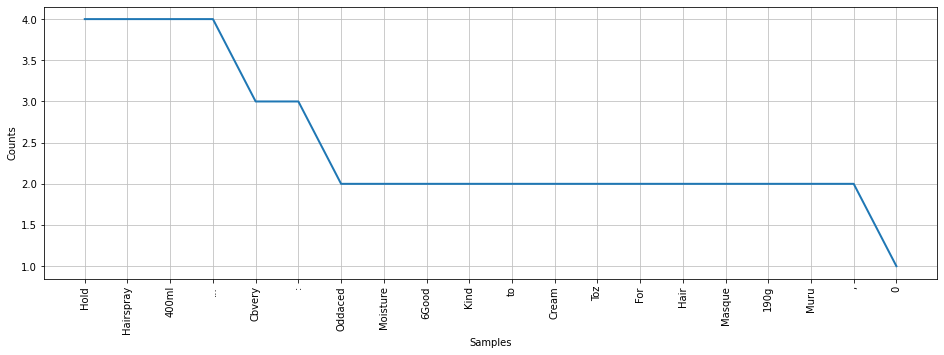

In [19]:
x=nltk.FreqDist(ToktokTokenizer().tokenize(retail['Product_Description']))
plt.figure(figsize=(16,5))
x.plot(20)

### Term Frequencies 

In [38]:
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(df_train_1.Phrase)

In [39]:
retail.head()

,ret_prod_id,Product_Description,Product_Description_length1,Product_Description_length
0,188,Oddaced Give Me Moisture Shampoo 250ml,38,38
1,334,Cbvery Freeze Hold Hairspray 400ml,34,34
2,328,Cbvery Firm Hold Hairspray 400ml,32,32
3,203,Oddaced Ultimate Hold Hairspray 400ml,37,37
4,324,Cbvery Extra Hold Hairspray 400ml,33,33
